# 列表

列表在 R 中扮演着一个至关重要的角色，是数据框 (`data.frame`) 和面向对象编程的基础。

## 创建列表

列表属于“递归型” (recursive) 向量。

创建一个列表

In [3]:
j <- list(
    name="Joe",
    salary=55000,
    union=T
)

打印列表

In [4]:
print(j)

$name
[1] "Joe"

$salary
[1] 55000

$union
[1] TRUE



R 语言中列表各组件的名称叫做 *标签** (tags)。

标签是可选的，不指定标签会自动生成默认标签。

In [5]:
jalt <- list("Joe", 55000, T)
print(jalt)

[[1]]
[1] "Joe"

[[2]]
[1] 55000

[[3]]
[1] TRUE



使用标签访问列表组件

In [7]:
print(j$name)

[1] "Joe"


因为列表也是向量，所以可以使用 `vector()` 创建列表

In [8]:
z <- vector(mode="list")
z[["abc"]] <- 3
print(z)

$abc
[1] 3



## 列表的常规操作

### 列表索引

有多种方式访问列表组件

In [14]:
print(j$salary)

[1] 55000


In [15]:
print(j[["salary"]])

[1] 55000


In [16]:
print(j[[2]])

[1] 55000


上述三种方式返回列表 lst 中的组件 c，返回值是 c 的数据类型：

- `lst$c`
- `lst[["c"]]`
- `lst[[i]]`，i 是 c 在 lst 中的数字编号

注意：使用双中括号返回组件本身

另外两种方式返回列表的子列表：

- `lst["c"]`
- `lst[1]`

注意：使用单中括号返回子列表

In [17]:
print(j[1:2])

$name
[1] "Joe"

$salary
[1] 55000



In [19]:
j2 <- j[2]
print(j2)

$salary
[1] 55000



In [21]:
print(class(j2))

[1] "list"


In [23]:
str(j2)

List of 1
 $ salary: num 55000


双中括号一次只能提取一个组件

下段代码

```R
j[[1:2]]
```

会抛出错误

```
Error in j[[1:2]]: 下标出界
```

In [25]:
j2a <- j[[2]]
print(j2a)

[1] 55000


In [27]:
print(class(j2a))

[1] "numeric"


### 增加或删除列表元素

列表创建之后可以增加新的组件

In [28]:
z <- list(
    a="abc",
    b=12
)
print(z)

$a
[1] "abc"

$b
[1] 12



增加组件 `c`

In [29]:
z$c <- "sailing"
print(z)

$a
[1] "abc"

$b
[1] 12

$c
[1] "sailing"



可以使用索引增加组件

In [30]:
z[[4]] <- 28
z[5:7] <- c(FALSE, TRUE, TRUE)
print(z)

$a
[1] "abc"

$b
[1] 12

$c
[1] "sailing"

[[4]]
[1] 28

[[5]]
[1] FALSE

[[6]]
[1] TRUE

[[7]]
[1] TRUE



删除列表元素可以直接将其设为 NULL

In [31]:
z$b <- NULL
print(z)

$a
[1] "abc"

$c
[1] "sailing"

[[3]]
[1] 28

[[4]]
[1] FALSE

[[5]]
[1] TRUE

[[6]]
[1] TRUE



注意：删掉 `z$b` 后，之后元素的索引全部减 1

列表拼接

In [34]:
print(c(list("Joe", 55000, T), list(5)))

[[1]]
[1] "Joe"

[[2]]
[1] 55000

[[3]]
[1] TRUE

[[4]]
[1] 5



### 获取列表长度

使用 `length()` 得到列表的组件个数，因为列表是向量

In [35]:
print(length(j))

[1] 3


### 扩展案例：文本词汇索引

`findwords()` 函数用于找到文本文件中的所有单词，并标出各个单词的位置

In [36]:
findwords <- function(tf) {
    txt <- scan(tf, "")
    wl <- list()
    for (i in 1:length(txt)) {
        wrd <- txt[i]
        wl[[wrd]] <- c(wl[[wrd]], i)
    }
    return(wl)
}

`scan()` 函数用于读取文本文件

示例：

In [38]:
print(scan("testconcorda.txt", ""))

 [1] "the"        "here"       "means"      "that"       "the"       
 [6] "first"      "item"       "in"         "this"       "line"      
[11] "of"         "output"     "is"         "item"       "in"        
[16] "this"       "case"       "our"        "output"     "consists"  
[21] "of"         "only"       "one"        "line"       "and"       
[26] "one"        "item"       "so"         "this"       "is"        
[31] "redundant"  "but"        "this"       "notation"   "helps"     
[36] "to"         "read"       "voluminous" "output"     "that"      
[41] "consists"   "of"         "many"       "items"      "spread"    
[46] "over"       "many"       "lines"      "for"        "example"   
[51] "if"         "there"      "were"       "two"        "rows"      
[56] "of"         "output"     "with"       "six"        "items"     
[61] "per"        "row"        "the"        "second"     "row"       
[66] "would"      "be"         "labeled"   


测试 `findwords()` 函数

In [61]:
wl <- findwords("testconcorda.txt")
print(wl)

$the
[1]  1  5 63

$here
[1] 2

$means
[1] 3

$that
[1]  4 40

$first
[1] 6

$item
[1]  7 14 27

$`in`
[1]  8 15

$this
[1]  9 16 29 33

$line
[1] 10 24

$of
[1] 11 21 42 56

$output
[1] 12 19 39 57

$is
[1] 13 30

$case
[1] 17

$our
[1] 18

$consists
[1] 20 41

$only
[1] 22

$one
[1] 23 26

$and
[1] 25

$so
[1] 28

$redundant
[1] 31

$but
[1] 32

$notation
[1] 34

$helps
[1] 35

$to
[1] 36

$read
[1] 37

$voluminous
[1] 38

$many
[1] 43 47

$items
[1] 44 60

$spread
[1] 45

$over
[1] 46

$lines
[1] 48

$`for`
[1] 49

$example
[1] 50

$`if`
[1] 51

$there
[1] 52

$were
[1] 53

$two
[1] 54

$rows
[1] 55

$with
[1] 58

$six
[1] 59

$per
[1] 61

$row
[1] 62 65

$second
[1] 64

$would
[1] 66

$be
[1] 67

$labeled
[1] 68



## 访问列表元素和值

`names()` 函数获取列表元素的标签

In [40]:
print(names(j))

[1] "name"   "salary" "union" 


使用 `unlist()` 函数获取列表的值

In [43]:
values <- unlist(j)
print(values)

   name  salary   union 
  "Joe" "55000"  "TRUE" 


实际上，`unlist` 返回值是一个向量，每个元素都被命名。
本例中返回的是字符串向量

In [46]:
print(class(values))

[1] "character"


对于全数值的列表，返回的是数值向量

In [47]:
z <- list(
    a=5,
    b=12,
    c=13
)
y <- unlist(z)
print(class(y))

[1] "numeric"


如果既有数值又有字符串，返回值会转为最通用的类型

优先级排序:

NULL < raw < 逻辑类型 < 整型 < 实数类型 < 复数类型 < 列表 < 表达式

In [51]:
w <- list(
    a=5,
    b="xyz"
)
wu <- unlist(w)
print(class(wu))

[1] "character"


In [50]:
print(wu)

    a     b 
  "5" "xyz" 


将元素名设为 NULL

In [52]:
names(wu) <- NULL
print(wu)

[1] "5"   "xyz"


也可以使用 `unname()` 去掉元素名

In [55]:
wun <- unname(y)
print(wun)

[1]  5 12 13


## 在列表上使用 apply 系列函数

### `lapply()` 和 `sapply()` 的使用

`lapply()` (list apply) 对列表中的每个组件执行给定函数，返回另一个列表

In [57]:
print(lapply(
    list(1:3, 25:29),
    median
))

[[1]]
[1] 2

[[2]]
[1] 27



`sapply()` (simplified lapply) 可以返回矩阵或向量

In [58]:
print(sapply(
    list(1:3, 25:29),
    median
))

[1]  2 27


### 扩展案例：文本词汇索引（续）

将 `findwords()` 函数的返回列表进行排序

`alphawl()` 将单词按字母顺序排序

In [59]:
alphawl <- function(wrdlst) {
    nms <- names(wrdlst)
    sn <- sort(nms)
    return(wrdlst[sn])
}

In [62]:
print(alphawl(wl))

$and
[1] 25

$be
[1] 67

$but
[1] 32

$case
[1] 17

$consists
[1] 20 41

$example
[1] 50

$first
[1] 6

$`for`
[1] 49

$helps
[1] 35

$here
[1] 2

$`if`
[1] 51

$`in`
[1]  8 15

$is
[1] 13 30

$item
[1]  7 14 27

$items
[1] 44 60

$labeled
[1] 68

$line
[1] 10 24

$lines
[1] 48

$many
[1] 43 47

$means
[1] 3

$notation
[1] 34

$of
[1] 11 21 42 56

$one
[1] 23 26

$only
[1] 22

$our
[1] 18

$output
[1] 12 19 39 57

$over
[1] 46

$per
[1] 61

$read
[1] 37

$redundant
[1] 31

$row
[1] 62 65

$rows
[1] 55

$second
[1] 64

$six
[1] 59

$so
[1] 28

$spread
[1] 45

$that
[1]  4 40

$the
[1]  1  5 63

$there
[1] 52

$this
[1]  9 16 29 33

$to
[1] 36

$two
[1] 54

$voluminous
[1] 38

$were
[1] 53

$with
[1] 58

$would
[1] 66



`freqwl()` 按词频排序

In [63]:
freqwl <- function(wrdlst) {
    freqs <- sapply(wrdlst, length)
    return(wrdlst[order(freqs)])
}

`order()` 返回排序后向量在原向量中的索引

In [65]:
x <- c(12, 5, 13, 8)
print(order(x))

[1] 2 4 1 3


In [66]:
print(freqwl(wl))

$here
[1] 2

$means
[1] 3

$first
[1] 6

$case
[1] 17

$our
[1] 18

$only
[1] 22

$and
[1] 25

$so
[1] 28

$redundant
[1] 31

$but
[1] 32

$notation
[1] 34

$helps
[1] 35

$to
[1] 36

$read
[1] 37

$voluminous
[1] 38

$spread
[1] 45

$over
[1] 46

$lines
[1] 48

$`for`
[1] 49

$example
[1] 50

$`if`
[1] 51

$there
[1] 52

$were
[1] 53

$two
[1] 54

$rows
[1] 55

$with
[1] 58

$six
[1] 59

$per
[1] 61

$second
[1] 64

$would
[1] 66

$be
[1] 67

$labeled
[1] 68

$that
[1]  4 40

$`in`
[1]  8 15

$line
[1] 10 24

$is
[1] 13 30

$consists
[1] 20 41

$one
[1] 23 26

$many
[1] 43 47

$items
[1] 44 60

$row
[1] 62 65

$the
[1]  1  5 63

$item
[1]  7 14 27

$this
[1]  9 16 29 33

$of
[1] 11 21 42 56

$output
[1] 12 19 39 57



将词频在前 10% 的单词绘制成条形图

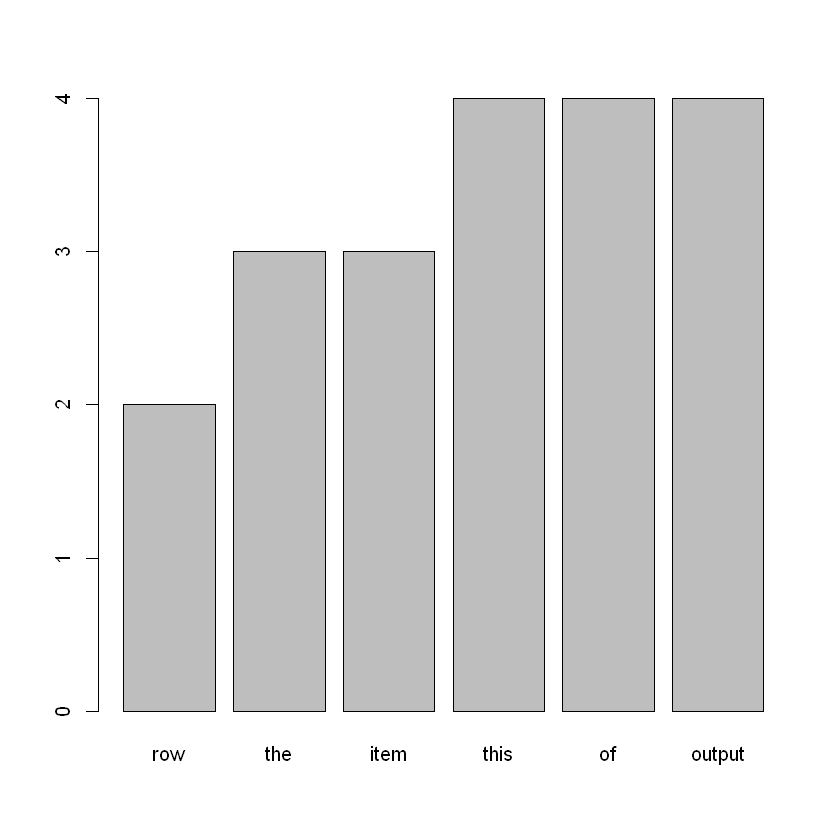

In [72]:
swl <- freqwl(wl)
nwords <- length(swl)
freqs9 <- sapply(swl[round(0.9*nwords):nwords], length)
barplot(freqs9)

### 扩展案例：鲍鱼数据

寻找三种不同类别的鲍鱼分别有哪些

In [73]:
g <- c("M", "F", "F", "I", "M", "M", "F")
print(lapply(
    c("M", "F", "I"),
    function(gender) which(g==gender)
))

[[1]]
[1] 1 5 6

[[2]]
[1] 2 3 7

[[3]]
[1] 4



注意：这里 `lapply()` 的第一个参数不是 `g`，`g` 出现在匿名函数中

## 递归型列表

列表的组件也可以是列表

In [74]:
b <- list(
    u=5,
    v=12
)
c <- list(
    w=13
)
a <- list(b, c)
print(a)

[[1]]
[[1]]$u
[1] 5

[[1]]$v
[1] 12


[[2]]
[[2]]$w
[1] 13




`c()` 有一个可选参数 `recursive` 决定在拼接列表时是否将列表“压平”，即把所有元素都提取出来，组合成一个向量

默认值为 FALSE，形成嵌套列表

In [75]:
print(c(list(
    a=1,
    b=2,
    c=list(
        d=5, 
        e=9
    )
)))

$a
[1] 1

$b
[1] 2

$c
$c$d
[1] 5

$c$e
[1] 9




设为 TRUE 时，`c` 组件中的元素 `d` 和 `e` 被取出，与 `a` 和 `b` 一同构成向量

In [77]:
print(c(list(
    a=1,
    b=2,
    c=list(
        d=5, 
        e=9
    )
), recursive=T))

  a   b c.d c.e 
  1   2   5   9 
